# Numerical linear algebra

- - - - - - - - - - - - - - -

Numerical linear algebra is the application of using computer algorithms to solve systems of equations and matrix operations. The following topics will be covered:
- Jacobi
- Gauss-Seidel
- Successive over-relaxation
- Conjugate gradient

Further readings and useful links are also provided at the bottom.

- - - - - - - - - - - - - - -

### Jacobi method

The Jacob method solves a matrix equation on a matrix that has no zeros along its main diagonal. Each diagonal element is solved for with the approximate value and iterated over and over until convergence happens.

Official definition here: https://mathworld.wolfram.com/JacobiMethod.html

The method can be expressed as:
- $x^{(k)} = D^{(-1)}(L+U)x^{(k-1)}+D^{(-1)}b$

where the matrices <i>D</i>, <i>-L</i>, and <i>-U</i> are diagonal, strictly lower, and strictly upper triangular matrices of the matrix <i>A</i>.

In [1]:
from pprint import pprint
import numpy as np
import pandas as pd

def Jacobi(A, b, T = 25, x = None):
    '''We initialise x as an array of zeros, and then afterwards we can replace that with our guesses.'''
    x = np.zeros(len(A[0]))
    
    '''This will let us isolate the diagonal of the matrix and turn it into its own matrix.'''
    C = np.diag(A)
    D = np.diagflat(C)

    '''I will be the identity matrix, where the diagonal length will be determined by the size of A.'''
    I = np.identity(len(A[0]))

    '''This will inverse the diagonal matrix.'''
    D_inv = np.linalg.inv(D)

    '''The solution is then obtained iteratively as:'''
    '''x**(k+1) = D**(-1)b + (I - D**(-1)A)x**k'''
    '''where D**(-1)b, D**(-1)A, and (I - D**(-1)A)x**k are all calculated through the dot product.'''
    
    results = []
    
    for i in range(T):
        x = np.dot(D_inv,b)+np.dot((I-np.dot(D_inv,A)),x)
        results.append(x)
        
    return results

A = np.array([[4,1,-1],[-1,3,1],[2,2,5]])
b = np.array([5,-4,1])
guess = np.array([0,0,0])

print('A: ')
pprint(A)
print()
print('b: ')
pprint(b)
print()
solution = Jacobi(A, b, T = 25, x = guess)

df = pd.DataFrame(solution)
df.rename(columns = {0:'x_1',1:'x_2',2:'x_3'}, inplace = True)
df

A: 
array([[ 4,  1, -1],
       [-1,  3,  1],
       [ 2,  2,  5]])

b: 
array([ 5, -4,  1])



,x_1,x_2,x_3
0,1.250000,-1.333333,0.200000
1,1.633333,-0.983333,0.233333
2,1.554167,-0.866667,-0.060000
3,1.451667,-0.795278,-0.075000
4,1.430069,-0.824444,-0.062556
5,1.440472,-0.835792,-0.042250
6,1.448385,-0.839093,-0.041872
7,1.449305,-0.836581,-0.043717
8,1.448216,-0.835659,-0.045090
9,1.447642,-0.835565,-0.045023


The following chart displays numerical convergence throughout the iterations.

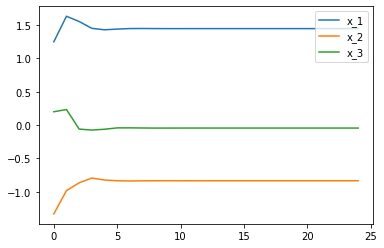

In [2]:
import matplotlib.pyplot as plt

df.plot();

### Gauss-Seidel method

The Gauss-Seidel method solves a system of linear equations on a strictly diagonally dominant or symmetric positive definite matrix one at a time in sequence by using previously computed results.

Official definition here: https://mathworld.wolfram.com/Gauss-SeidelMethod.html

The method can be expressed as:
- $x^{(k)} = (D-L)^{(-1)}(Ux^{(k-1)}+b)$

where the matrices <i>D</i>, <i>-L</i>, and <i>-U</i> are diagonal, strictly lower, and strictly upper triangular matrices of the matrix <i>A</i>.

In [3]:
from pprint import pprint
import numpy as np
import pandas as pd

def GaussSeidel(A, b, T = 25, x = None):
    '''We initialise x as an array of zeros, and then afterwards we can replace that with our guesses.'''
    x = np.zeros(len(A[0]))

    '''This will let us isolate the diagonal of the matrix and turn it into its own matrix.'''
    C = np.diag(A)
    D = np.diagflat(C)

    '''I will be the identity matrix, where the diagonal length will be determined by the size of A.'''
    I = np.identity(len(A[0]))
    
    '''This breaks the matrix of A into its upper and lower matrix components.'''
    lower = np.tril(A)
    upper = np.triu(A)
    
    '''This will inverse the lower matrix.'''
    lower_inv = np.linalg.inv(lower)

    '''The solution is then obtained iteratively as:'''
    '''x**(k+1) = L**(-1)b + (I - L**(-1)A)x**k'''
    '''where L**(-1)b, L**(-1)A, and (I - L**(-1)A)x**k are all calculated through the dot product.'''
    
    results = []
    
    for i in range(T):
        x = np.dot(lower_inv,b)+np.dot(I-np.dot(lower_inv,A),x)
        results.append(x)
        
    return results

A = np.array([[4,1,-1],[-1,3,1],[2,2,5]])
b = np.array([5,-4,1])
guess = np.array([0,0,0])

print('A: ')
pprint(A)
print()
print('b: ')
pprint(b)
print()
solution = GaussSeidel(A, b, T = 25, x = guess)

df = pd.DataFrame(solution)
df.rename(columns = {0:'x_1',1:'x_2',2:'x_3'}, inplace = True)
df

A: 
array([[ 4,  1, -1],
       [-1,  3,  1],
       [ 2,  2,  5]])

b: 
array([ 5, -4,  1])



,x_1,x_2,x_3
0,1.250000,-0.916667,0.066667
1,1.495833,-0.856944,-0.055556
2,1.450347,-0.831366,-0.047593
3,1.445943,-0.835488,-0.044182
4,1.447826,-0.835997,-0.044732
5,1.447816,-0.835817,-0.044800
6,1.447754,-0.835815,-0.044776
7,1.447760,-0.835821,-0.044775
8,1.447762,-0.835821,-0.044776
9,1.447761,-0.835821,-0.044776


The following chart displays numerical convergence throughout the iterations.

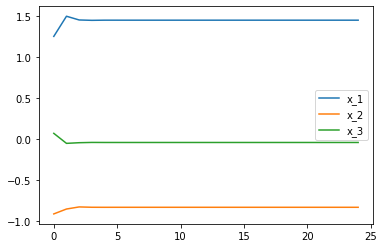

In [4]:
import matplotlib.pyplot as plt

df.plot();

### Successive over-relaxation method

The successive over-relaxation method solves a system of linear equations by extrapolating the Gauss-Seidel method by taking weighted averages between previous and the current iterations.

Official definition here: https://mathworld.wolfram.com/SuccessiveOverrelaxationMethod.html

The method can be expressed as:
- $x^{(k)} = (D-\omega L)^{(-1)}[\omega U + (1-\omega)D]x^{(k-1)}+\omega(D-\omega L)^{-1}b$

where the matrices <i>D</i>, <i>-L</i>, and <i>-U</i> are diagonal, strictly lower, and strictly upper triangular matrices of the matrix <i>A</i>.

In [5]:
from pprint import pprint
import numpy as np
import pandas as pd

def SOR(A, b, T = 25, w = 1.1, x = None):
    '''We initialise x as an array of zeros, and then afterwards we can replace that with our guesses.'''
    x = np.zeros(len(A[0]))

    '''This will let us isolate the diagonal of the matrix and turn it into its own matrix.'''
    C = np.diag(A)
    D = np.diagflat(C)
    
    '''This gives us the strictly upper and lower matrix components of A.'''
    lower = D-np.tril(A)
    upper = D-np.triu(A)
    
    '''With one of the main components being (D - wL)**-1, this will inverse the matrix.'''
    DwL_inv = np.linalg.inv(D - w*lower)

    '''The solution is then obtained iteratively as:'''
    '''x**(k+1) = (D - wL)**-1 * [wU + (1 - w)D]x + w(D - wL)**-1(b)'''
    '''where [wU + (1 - w)D]x and w(D - wL)**-1(b) are all calculated through the dot product.'''
    
    results = []
    
    for i in range(T):
        x = np.dot(DwL_inv,np.dot((w*upper+(1-w)*D),x))+np.dot(w*DwL_inv,b)
        results.append(x)
        
    return results

A = np.array([[4,1,-1],[-1,3,1],[2,2,5]])
b = np.array([5,-4,1])
guess = np.array([0,0,0])

print('A: ')
pprint(A)
print()
print('b: ')
pprint(b)
print()
solution = SOR(A, b, T = 25, w = 1.1, x = guess)

df = pd.DataFrame(solution)
df.rename(columns = {0:'x_1',1:'x_2',2:'x_3'}, inplace = True)
df

A: 
array([[ 4,  1, -1],
       [-1,  3,  1],
       [ 2,  2,  5]])

b: 
array([ 5, -4,  1])



,x_1,x_2,x_3
0,1.375000,-0.962500,0.038500
1,1.512775,-0.829849,-0.084337
2,1.428738,-0.828887,-0.035501
3,1.450308,-0.838982,-0.045433
4,1.448195,-0.835105,-0.045216
5,1.447400,-0.835864,-0.044554
6,1.447870,-0.835858,-0.044830
7,1.447746,-0.835803,-0.044772
8,1.447759,-0.835825,-0.044774
9,1.447763,-0.835821,-0.044777


The following chart displays numerical convergence throughout the iterations.

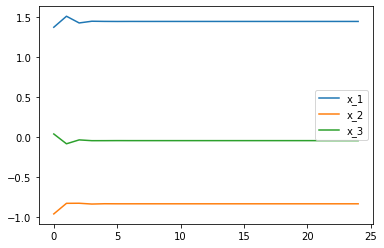

In [6]:
import matplotlib.pyplot as plt

df.plot();

### Conjugate gradient method

The conjugate gradient method solves a system of linear equations on a symmetric and positive definite matrix with an initial guess and the <i>k+1</i>-th step of the steepest gradient descent method.

Official definition here: https://mathworld.wolfram.com/ConjugateGradientMethod.html

The method can be expressed as:
- $x^{(k+1)} = (D-\omega L)^{(-1)}[\omega U + (1-\omega)D]x+\omega(D-\omega L)^{-1}b$

where the matrices <i>D</i>, <i>-L</i>, and <i>-U</i> are diagonal, strictly lower, and strictly upper triangular matrices of the matrix <i>A</i>.

In [7]:
from pprint import pprint
import numpy as np
import pandas as pd

def ConjugateGradient(A, b, x = guess):
    '''The basic formula defined as r_0 = b - Ax_0.'''
    r = b - np.dot(A,x)
    
    '''After running through the residual step, we have a new p_0.'''
    p = r
    
    '''We need this as part of calculating the top half of alpha where the transpose of r_0 dots r_0.'''
    rsold = np.dot(np.transpose(r),r)
    
    '''The solution is then obtained iteratively as:'''
    '''x**(k+1) = (D - wL)**-1 * [wU + (1 - w)D]x + w(D - wL)**-1(b)'''
    '''where [wU + (1 - w)D]x and w(D - wL)**-1(b) are all calculated through the dot product.'''
    
    results = []
    
    for i in range(len(b)):
        Ap = np.dot(A,p)
        
        '''Alpha is defined as alpha_0 = ((r_0)**T*r_0)/((p_0)**T*Ap_0).'''
        alpha = rsold/(np.dot(np.transpose(p),Ap))
        
        '''x_1 is defined as x_0 + alpha_0*P_0.'''
        x = x + np.dot(alpha,p)
        
        '''r_1 is defined as r_0 - alpha_0*Ap_0.'''
        r = r - np.dot(alpha,Ap)
        
        '''This will be used as a way to calculate beta_0, which will be used to find p_1.'''
        rsnew = np.dot(np.transpose(r),r)
        
        '''This will make sure the loop runs until the residue is sufficiently small enough.'''
        if np.sqrt(rsnew) < (10**(-100)):
            break
            
        '''p_1 is defined as r_1 + beta_0*p_0,, where beta_0 is defined as ((r_1)**T*r_1)/((r_0)**T*r_0)'''
        p = r + np.dot((rsnew / rsold),p)
        rsold = rsnew
        
        results.append(x)
        
    return results

A = np.array([[4,1,-1],[-1,3,1],[2,2,5]])
b = np.array([5,-4,1])
guess = np.array([0,0,0])

print('A: ')
pprint(A)
print()
print('b: ')
pprint(b)
print()
solution = ConjugateGradient(A, b, x = guess)

df = pd.DataFrame(solution)
df.rename(columns = {0:'x_1',1:'x_2',2:'x_3'}, inplace = True)
df

A: 
array([[ 4,  1, -1],
       [-1,  3,  1],
       [ 2,  2,  5]])

b: 
array([ 5, -4,  1])



,x_1,x_2,x_3
0,1.438356,-1.150685,0.287671
1,1.701285,-1.027223,0.006452
2,1.675189,-0.785780,-0.234207


The following chart displays numerical convergence throughout the iterations.

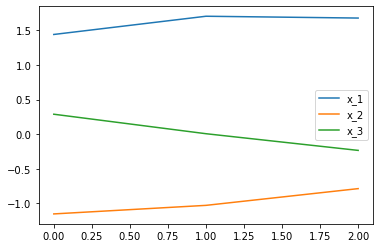

In [8]:
import matplotlib.pyplot as plt

df.plot();

## Further readings:
Applications in data:<br>
https://onlinelibrary.wiley.com/doi/10.1002/gamm.202000014

Applications in machine learning:<br>
https://machinelearningmastery.com/examples-of-linear-algebra-in-machine-learning/

Stanford course notes on computer vision, robotics, and graphics:<br>
https://graphics.stanford.edu/courses/cs205a-13-fall/assets/notes/cs205a_notes.pdf

## Useful links:
Matrix calculator:<br>
https://matrixcalc.org/en/